<a href="https://colab.research.google.com/github/CVaishnavi1231/Projects/blob/main/imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import numpy as np
 
from matplotlib import pyplot as plt
 
if os.path.isdir('models'):
  os.mkdir('models')
 
import pandas as pd
import keras as K
import seaborn as sns
 
import matplotlib.pyplot as plt
import os
import json
import tempfile
 
 
 
print("Tensorflow version", tf.__version__)
print("Seaborn version:",sns.__version__)

Using TensorFlow backend.


Tensorflow version 2.2.0
Seaborn version: 0.10.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def three_classes(x,y):
  
  indices_0, _=np.where(y==0.)
  indices_1, _=np.where(y==1.)
  indices_2, _=np.where(y==2.)

  indices= np.concatenate([indices_0,indices_1,indices_2], axis=0)

  x=x[indices]
  y=y[indices]

  count=x.shape[0]

  indices= np.random.choice(range(count),count,replace=False)

  x=x[indices]
  y=y[indices]

  y=tf.keras.utils.to_categorical(y)

  return x,y



In [ ]:
(x_train,y_train) ,(x_test,y_test)= tf.keras.datasets.cifar10.load_data()

x_train,y_train= three_classes(x_train,y_train)
x_test,y_test= three_classes(x_test,y_test)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)




170500096/170498071 [==============================] - 2s 0us/step
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


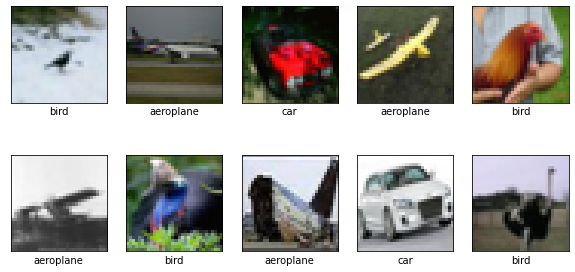

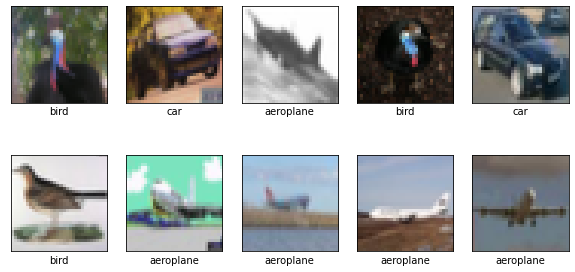

In [ ]:
class_names= ['aeroplane','car','bird']

def random_ex(x,y,p):

  indices=np.random.choice(range(x.shape[0]),10, replace=False)

  x= x[indices]
  y= y[indices]
  p= p[indices]


  plt.figure(figsize=(10,5))
  for i in range(10):
    plt.subplot(2,5,1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[np.argmax(p[i])])
  plt.show()

random_ex(x_train,y_train,y_train)
random_ex(x_test,y_test,y_test)






In [ ]:
#CREATE THE MODEL

from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.layers import Dropout,Flatten,Input, Dense


def model_create():
  def conv_block(model, num_filters):

    model.add(Conv2D(num_filters,3,activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(num_filters,3,activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.5))
    return model

  model=tf.keras.models.Sequential()
  model.add(Input(shape=(32,32,3)))

  model= conv_block(model, 32)
  model= conv_block(model, 64)
  model= conv_block(model,128)

  model.add(Flatten())
  model.add(Dense(3,activation='softmax'))

  model.compile(
      loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy']

  )

  return model

model = model_create()  
model.summary()








Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        2

In [ ]:
history=model.fit(
    
    x_train/255., y_train,
    validation_data= (x_test/255.,y_test),
    epochs=10,batch_size=128,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)]
    

)

Epoch 1/10
118/118 [==============================] - 85s 721ms/step - loss: 0.8880 - accuracy: 0.6748 - val_loss: 3.6891 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 85s 720ms/step - loss: 0.5568 - accuracy: 0.7766 - val_loss: 3.0128 - val_accuracy: 0.3453
Epoch 3/10
118/118 [==============================] - 85s 724ms/step - loss: 0.4852 - accuracy: 0.8047 - val_loss: 2.3302 - val_accuracy: 0.4913
Epoch 4/10
118/118 [==============================] - 85s 723ms/step - loss: 0.4521 - accuracy: 0.8241 - val_loss: 1.4939 - val_accuracy: 0.5190
Epoch 5/10
118/118 [==============================] - 85s 719ms/step - loss: 0.4121 - accuracy: 0.8415 - val_loss: 0.8825 - val_accuracy: 0.6757
Epoch 6/10
118/118 [==============================] - 86s 731ms/step - loss: 0.3881 - accuracy: 0.8503 - val_loss: 0.6217 - val_accuracy: 0.7747
Epoch 7/10
118/118 [==============================] - 91s 771ms/step - loss: 0.3638 - accuracy: 0.8562 - val_loss: 0.3709 - val_ac

In [ ]:
preds= model.predict(x_test/255.)


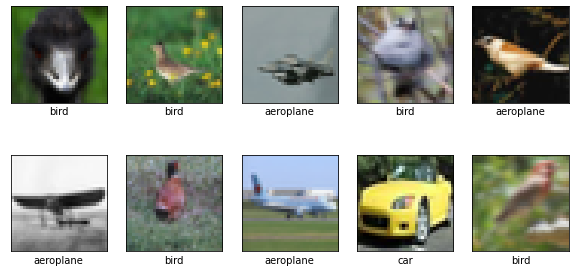

In [ ]:
random_ex(x_test,y_test,preds)

In [ ]:
Model_Directory=tempfile.gettempdir()

In [ ]:
Model_Directory

'/tmp'

In [ ]:
version=1


In [ ]:
export_path=os.path.join(Model_Directory,str(version))
print('export path={}\n'.format(export_path))

export path=/tmp/1



In [ ]:
if os.path.isdir(export_path):
  print('\nalready saved a model, cleaning up\n')
  !rm ~r (export_path)

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None )

print('\saved model:')
!ls -l {export_path}

 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/1/assets
\saved model:
total 424
drwxr-xr-x 2 root root   4096 Aug  3 10:48 assets
-rw-r--r-- 1 root root 422193 Aug  3 10:48 saved_model.pb
drwxr-xr-x 2 root root   4096 Aug  3 10:48 variables


In [ ]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  35035      0 --:--:-- --:--:-- --:--:-- 35457
OK
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Ge

In [ ]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 187 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.2.0 [187 MB]
Fetched 187 MB in 4s (51.8 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.2.0_all.deb ...
Unpacking tensorflow-model-server (2.2.0) ...
Setting up tensorflow-model-server (2.2.0) ...


In [ ]:
os.environ["MODEL_DIR"] = Model_Directory

In [ ]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name= transport_model\
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [ ]:
!tail server.log

2020-08-03 11:07:27.014139: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-08-03 11:07:27.056652: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2020-08-03 11:07:27.149738: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /tmp/1
2020-08-03 11:07:27.180028: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:364] SavedModel load for tags { serve }; Status: success: OK. Took 176141 microseconds.
2020-08-03 11:07:27.182906: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:105] No warmup data file found at /tmp/1/assets.extra/tf_serving_warmup_requests
2020-08-03 11:07:27.183072: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name:  version: 1}
2020-08-03 11:07:27.185150: I tensor

In [ ]:
def show(idx, title):
  plt.figure()
  plt.imshow(x_test[idx].reshape(28,28))
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

import random
rando = random.randint(0,len(x_test)-1)
show(rando, 'An Example Image: {}'.format(class_names[y_test[rando]]))

In [ ]:
import json
data = json.dumps({"signature_name": "serving_default", "instances": x_test[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... [116, 107, 95], [207, 179, 154], [224, 200, 170]]]]}


In [ ]:
!pip install -q requests

import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/transport_model:preds', data=data, headers=headers)
preds = json.loads(json_response.text)['preds']

show(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
  class_names[np.argmax(predictions[0])], np.argmax(predictions[0]), class_names[y_test[0]], y_test[0]))